# Problem set 4
Zhihan Yu

## Problem 1

### Problem 1a

In [1]:
from matplotlib import pyplot as plt
import numpy as np

Text(0.5, 1.0, 'MACSS Earnings Distribution from 2018-2020')

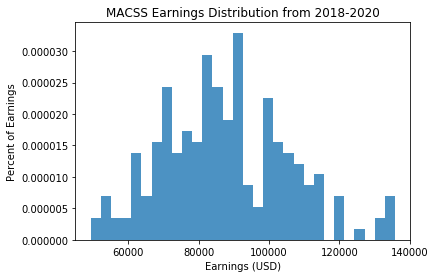

In [2]:
data = np.loadtxt(r"C:\Users\ZongYuan\Documents\!Jeff\WinterQuarter\MCSS\course\persp-model-econ_W19\ProblemSets\PS4\data\incomes.txt")
plt.hist(data, bins=30, density=True, alpha=0.8)
plt.ylabel("Percent of Earnings")
plt.xlabel("Earnings (USD)")

plt.title("MACSS Earnings Distribution from 2018-2020")

### Problem 1b

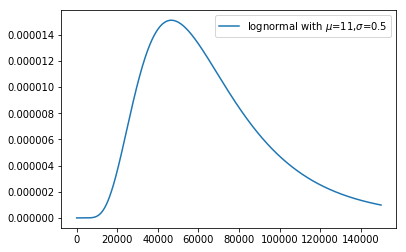

In [3]:
def LN_pdf(xvals, mu, sigma):
    '''
    --------------------------------------------------------------------
    This function gives the PDF of the lognormal distribution for xvals
    given mu and sigma
    (LN): f(x; mu, sigma) = (1 / (x * sigma * sqrt(2 * pi))) *
            exp((-1 / 2) * (((log(x) - mu) / sigma) ** 2))
            x in [0, infty), mu in (-infty, infty), sigma > 0
    --------------------------------------------------------------------
    INPUTS:
    xvals = (N,) vector, data
    mu    = scalar, mean of the ln(x)
    sigma = scalar > 0, standard deviation of ln(x)
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION: None
    OBJECTS CREATED WITHIN FUNCTION:
    pdf_vals        = (N,) vector, probability of each observation given
                      the parameter values
    RETURNS: pdf_vals
    --------------------------------------------------------------------
    '''
    pdf_vals = np.float64(((1 / (np.sqrt(2 * np.pi) * sigma * xvals)) *
                          np.exp((-1.0 / 2.0) * (((np.log(xvals) - mu) / sigma) ** 2))))
    return pdf_vals
x_val = np.linspace(0.01, 150000, 30000)
plt.plot(x_val, LN_pdf(x_val, 11, 0.5), label='lognormal with $\mu$=11,$\sigma$=0.5')
# TODO: Got to get the y-axis to be labeled correctly
plt.legend()

In [4]:
def log_liklihood_lognorm(xvals, mu, sigma):
    pdf_vals = LN_pdf(xvals, mu, sigma)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

# value of the log likelihood value for this parameterization of the distribution and given this data
print("Log-Likelihood with mu=11 and sigma=0.5 is: ", log_liklihood_lognorm(data, 11, 0.5))

Log-Likelihood with mu=11 and sigma=0.5 is:  -2385.856997808558


### Problem 1c 

optimal mu= 11.359022997492094 optimal sigma= 0.20817732006703676
Log-Likelihood with mu=11 and sigma=0.5 is:  -2385.856997808558
MLE Log-likelihood:  -2241.7193013573583


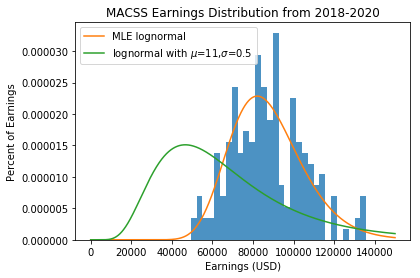

In [5]:
def objective_func(params, xvals):
    """
    ---------------
    This defines the objective function for the negative lognormal distribution. 
    Instead of maximizing, the objective function is minimized.
    ---------------
    INPUTS:
        params: tuple of length 2
            the tuple takes the form (mu, sigma)
        args: array-like
            data
    OUTPUTS:
        negative log-likelihood.
    """
    mu, sigma = params
    neg_log_likeli = - log_liklihood_lognorm(xvals, mu, sigma)
    return neg_log_likeli



import scipy.optimize as opt

lam_obj_x = lambda params: objective_func(params, data)

mu_init = 11.35  # mu_2
sig_init = 0.2  # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = data
results_uncstr = opt.minimize(lam_obj_x, params_init)
MLE_mu, MLE_sigma = results_uncstr.x

plt.hist(data, bins=30, density=True, alpha=0.8)
plt.ylabel("Percent of Earnings")
plt.xlabel("Earnings (USD)")
plt.title("MACSS Earnings Distribution from 2018-2020")
plt.plot(x_val, LN_pdf(x_val, MLE_mu, MLE_sigma), label='MLE lognormal')
plt.plot(x_val, LN_pdf(x_val, 11, 0.5), label='lognormal with $\mu$=11,$\sigma$=0.5')
plt.legend()

print("optimal mu=", MLE_mu, "optimal sigma=", MLE_sigma)
print("Log-Likelihood with mu=11 and sigma=0.5 is: ", log_liklihood_lognorm(data, 11, 0.5))
print("MLE Log-likelihood: ", log_liklihood_lognorm(data, MLE_mu, MLE_sigma))

In [6]:
vcv_mle = results_uncstr.hess_inv
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('Variance-Covariance Matrix of MLE:')
print(vcv_mle)
print()
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

Variance-Covariance Matrix of MLE:
[[ 2.18131268e-04 -5.53136830e-07]
 [-5.53136830e-07  1.08660405e-04]]

Standard error for mu estimate =  0.014769267689794042
Standard error for sigma estimate =  0.010424030187679262


### Problem 1d

In [7]:
import scipy.stats as sts

mu_init, sigma_init = 11., 0.5
log_lik_h0 = log_liklihood_lognorm(data, mu_init, sigma_init)
print('hypothesis value log likelihood:', log_lik_h0)
print()
log_lik_mle = log_liklihood_lognorm(data, MLE_mu, MLE_sigma)
print('MLE log likelihood:', log_lik_mle)
print()
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value:', LR_val)
print()
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value:', pval_h0)

hypothesis value log likelihood: -2385.856997808558

MLE log likelihood: -2241.7193013573583

likelihood ratio value: 288.2753929023993

chi squared of H0 with 2 degrees of freedom p-value: 0.0


In [8]:
from scipy.special import erf

def lognormalcdf(x, mu, sig):
    inerf = (np.log(x) - mu) / (sig * (2 ** 0.5))
    rtnval = 0.5 + 0.5 * erf(inerf)
    
    return rtnval

print("Probability less than $75000: ", "%.2f" %(lognormalcdf(75000, MLE_mu, MLE_sigma)*100) + "%.")
print("Probability less than $100000: ", "%.2f" %((1-lognormalcdf(100000, MLE_mu, MLE_sigma))*100) + "%.")


Probability less than $75000:  26.02%.
Probability less than $100000:  22.99%.


## Problem 2
### Problem 2a

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression as lin

ModuleNotFoundError: No module named 'pandas'

In [10]:
sick_dat = pd.read_csv(r"C:\Users\ZongYuan\Documents\!Jeff\WinterQuarter\MCSS\course\persp-model-econ_W19\ProblemSets\PS4\data\sick.txt")

#Check out the first few observations
sick_dat.head(5)

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


In [11]:
# Use OLS to find the initialization of MLEs 
y_vals = np.array(sick_dat['sick'])
x_mat = np.array(sick_dat[['age', 'children', 'avgtemp_winter']])


reg = lin().fit(x_mat, y_vals)
base_coef = reg.coef_
base_intercept = reg.intercept_
print("Regression coefficients:", reg.coef_)
print("Regression intercept:", base_intercept)

Regression coefficients: [ 0.01293366  0.40049939 -0.00999174]
Regression intercept: 0.25164137472290005


In [12]:
def eps_creation(y, x1, x2, x3, b0, b1, b2, b3):
    
    epsilons = y - b0 - b1*x1 - b2*x2 - b3*x3
    
    return epsilons

epsilons = eps_creation(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                        base_intercept, base_coef[0], base_coef[1], base_coef[2])

print("Standard deviation of the error terms is roughly",'%.3f' % epsilons.std())

Standard deviation of the error terms is roughly 0.003


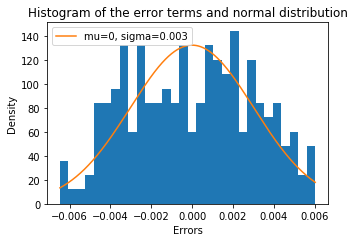

In [13]:
def normalpdf(x, mu, sig):
    
    sig = abs(sig)
    
    fracpart = 1 / ((2 * np.pi * (sig ** 2)) ** 0.5)
    expopart = (-1) * ((x - mu)**2)/(2*(sig**2))
    var = fracpart * (np.e ** expopart)

    return var

plt.hist(epsilons, bins=30, density=True)
lb, ub= np.min(epsilons), np.max(epsilons)
xspace = np.linspace(lb, ub, 1001)
norm_byone = normalpdf(xspace, 0, epsilons.std())
plt.plot(xspace, norm_byone, label='mu=0, sigma=0.003')
plt.title("Histogram of the error terms and normal distribution")
plt.ylabel(r'Density')
plt.xlabel(r'Errors')
plt.subplots_adjust(bottom=.25, left=.25)
plt.legend()


In [14]:
def loglikelihood_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma):
    
    epsilons = eps_creation(y, x1, x2, x3, b0, b1, b2, b3)
    normal_densities = normalpdf(epsilons, 0, sigma)
    ln_densities = np.log(normal_densities)
    log_likeli = np.sum(ln_densities)
    
    return log_likeli

def obj_normal(params, *args):

    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    
    return -loglikelihood_norm(y, x1, x2, x3, b0, b1, b2, b3, sigma)

arguments = (y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2])
params_init2 = (0.2, 0.01, 0.4, -0.01, 0.05)

results_uncstr2 = opt.minimize(obj_normal, params_init2, arguments)
print(results_uncstr2.x)
print(-results_uncstr2.fun)

[ 0.25164623  0.01293336  0.40050207 -0.00999168  0.00301767]
876.8650465013083


c:\users\zongyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\zongyuan\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
c:\users\zongyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\zongyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
c:\users\zongyuan\appdata\local\programs\python\python37\lib\site-packages\scipy\optimize\optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
c:\users\zongyuan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: 

In [15]:
vcv_mle2 = results_uncstr2.hess_inv
print('Variance-Covariance Matrix of MLE:')
print(vcv_mle2)

Variance-Covariance Matrix of MLE:
[[ 6.83919851e-07  8.08263021e-09 -1.50549601e-07 -1.65431103e-08
   1.83941184e-09]
 [ 8.08263021e-09  3.95805544e-09 -3.52308643e-08 -2.49896038e-09
  -1.37279200e-10]
 [-1.50549601e-07 -3.52308643e-08  3.58007527e-07  2.23567785e-08
  -6.43027553e-11]
 [-1.65431103e-08 -2.49896038e-09  2.23567785e-08  1.83861416e-09
   9.81913973e-11]
 [ 1.83941184e-09 -1.37279200e-10 -6.43027553e-11  9.81913973e-11
   2.19897025e-08]]


### Problem 2b

In [16]:
hyp_b0, hyp_b1, hyp_b2, hyp_b3, hyp_sigma = 1, 0, 0, 0, 0.1
mle_b0, mle_b1, mle_b2, mle_b3, mle_sigma = results_uncstr2.x

log_lik_h0 = loglikelihood_norm(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                       hyp_b0, hyp_b1, hyp_b2, hyp_b3, hyp_sigma)
print('hypothesis value log likelihood:', log_lik_h0)
print()
log_lik_mle = loglikelihood_norm(y_vals, x_mat[:, 0], x_mat[:, 1], x_mat[:, 2],
                        mle_b0, mle_b1, mle_b2, mle_b3, mle_sigma)
print('MLE log likelihood:', log_lik_mle)
print()
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value:', LR_val)
print()
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)
print('chi squared of H0 with 5 degrees of freedom p-value:', pval_h0)

hypothesis value log likelihood: -2253.7006880421245

MLE log likelihood: 876.8650465013083

likelihood ratio value: 6261.131469086866

chi squared of H0 with 5 degrees of freedom p-value: 0.0
